# Intensity-Duration-Frequency Curves

The code to generate IDF Curves from a file of daily maximum rainfall per month

In [1]:
import csv
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
with open('max_rain.csv', 'r') as f:
  reader = csv.reader(f)
  max_rain = list(reader)
    
print(max_rain)

[['1927', '111.3'], ['1928', '74.2'], ['1929', '88.1'], ['1930', '69.3'], ['1931', '71.9'], ['1932', '85.3'], ['1933', '71.4'], ['1934', '67.1'], ['1935', '143.3'], ['1936', '92.7'], ['1937', '96.5'], ['1938', '87.9'], ['1939', '62.5'], ['1940', '66.3'], ['1941', '77'], ['1942', '96.5'], ['1943', '62.2'], ['1944', '158.8'], ['1945', '70.9'], ['1946', '86.6'], ['1947', '59.7'], ['1948', '42.7'], ['1949', '77.7'], ['1950', '65.3'], ['1951', '81.3'], ['1952', '48'], ['1953', '73.7'], ['1954', '63.8'], ['1955', '69.8'], ['1956', '52.6'], ['1957', '56.6'], ['1958', '74.9'], ['1959', '65.3'], ['1960', '61.5'], ['1961', '50.5'], ['1962', '51.6'], ['1963', '71.9'], ['1964', '46.2'], ['1965', '40.4'], ['1966', '54.4'], ['1967', '75.4'], ['1968', '47.5'], ['1969', '50.5'], ['1970', '51.3'], ['1971', '69.1'], ['1972', '49'], ['1973', '60.2'], ['1974', '59.7'], ['1975', '78.2'], ['1976', '126.5'], ['1977', '79'], ['1978', '58.2'], ['1979', '67.6'], ['1980', '68.1'], ['1981', '126.7'], ['1982', '53

So that gives us a list of dates and rainfall. Now to separate the rainfall.

In [3]:
rainfall = []        #Getting the rainfall into a list
for x in max_rain:
    rainfall.append(float(x[1]))
    
print(rainfall)

[111.3, 74.2, 88.1, 69.3, 71.9, 85.3, 71.4, 67.1, 143.3, 92.7, 96.5, 87.9, 62.5, 66.3, 77.0, 96.5, 62.2, 158.8, 70.9, 86.6, 59.7, 42.7, 77.7, 65.3, 81.3, 48.0, 73.7, 63.8, 69.8, 52.6, 56.6, 74.9, 65.3, 61.5, 50.5, 51.6, 71.9, 46.2, 40.4, 54.4, 75.4, 47.5, 50.5, 51.3, 69.1, 49.0, 60.2, 59.7, 78.2, 126.5, 79.0, 58.2, 67.6, 68.1, 126.7, 53.6, 56.9, 75.7, 79.6, 81.8, 62.4, 114.5, 54.5, 69.2, 69.3, 100.3, 87.8, 142.4, 55.5, 81.0, 65.1, 142.0, 102.7, 141.0, 53.5, 66.6, 105.0, 57.0, 82.0, 79.8, 61.5, 54.7, 128.0, 88.0, 63.4, 93.4, 76.7, 58.1, 64.5, 77.0]


Declaring the durations of interest and calcuating the rainfall intensities

In [4]:
short = {5:[], 10:[], 15:[], 20:[], 25:[], 30:[], 60:[], 120:[], 180:[], 360:[], 720:[], 1440:[]}

for key in short.keys():
    for val in rainfall:
        short[key].append(round((val*((key/60)/24)**(1/3))/key*60, 2))

print(short[5])

[202.25, 134.83, 160.09, 125.93, 130.65, 155.0, 129.74, 121.93, 260.39, 168.45, 175.35, 159.72, 113.57, 120.48, 139.92, 175.35, 113.02, 288.56, 128.83, 157.36, 108.48, 77.59, 141.19, 118.66, 147.73, 87.22, 133.92, 115.93, 126.84, 95.58, 102.85, 136.1, 118.66, 111.75, 91.76, 93.76, 130.65, 83.95, 73.41, 98.85, 137.01, 86.31, 91.76, 93.22, 125.56, 89.04, 109.39, 108.48, 142.1, 229.87, 143.55, 105.76, 122.84, 123.75, 230.23, 97.4, 103.39, 137.56, 144.64, 148.64, 113.39, 208.06, 99.03, 125.74, 125.93, 182.26, 159.54, 258.76, 100.85, 147.19, 118.29, 258.03, 186.62, 256.21, 97.22, 121.02, 190.8, 103.58, 149.0, 145.01, 111.75, 99.4, 232.59, 159.91, 115.21, 169.72, 139.37, 105.57, 117.2, 139.92]


Short duration intensities obtained, now to define the frequency factors.

In [5]:
K = {2:-0.164, 5:0.719, 10:1.305, 25:2.044, 50:2.592, 100:3.137}
periods = {2:[], 5:[], 10:[], 25:[], 50:[], 100:[]}
    
for year in K.keys():
    for duration in short.values():
        periods[year].append(round(np.mean(duration) + K[year] * np.std(duration)))

print(periods[2])

[131.0, 83.0, 63.0, 52.0, 45.0, 40.0, 25.0, 16.0, 12.0, 8.0, 5.0, 3.0]


In [6]:
duration = []
for x in short.keys():
    duration.append(x)
    
print(duration)

[5, 10, 15, 20, 25, 30, 60, 120, 180, 360, 720, 1440]


Convert lists to dataframe to make things more organised

In [9]:
df = pd.DataFrame({'duration':duration, '2_year':periods[2], '5_year':periods[5], '10_year':periods[10], '25_year':periods[25], '50_year':periods[50], '100_year':periods[100]})
df.set_index('duration', inplace=True)
df

,100_year,10_year,25_year,2_year,50_year,5_year
duration,,,,,,
5,281.0,198.0,231.0,131.0,256.0,171.0
10,177.0,124.0,146.0,83.0,161.0,108.0
15,135.0,95.0,111.0,63.0,123.0,82.0
20,111.0,78.0,92.0,52.0,102.0,68.0
25,96.0,68.0,79.0,45.0,87.0,58.0
30,85.0,60.0,70.0,40.0,77.0,52.0
60,54.0,38.0,44.0,25.0,49.0,33.0
120,34.0,24.0,28.0,16.0,31.0,21.0
180,26.0,18.0,21.0,12.0,23.0,16.0


Plotting the stuff

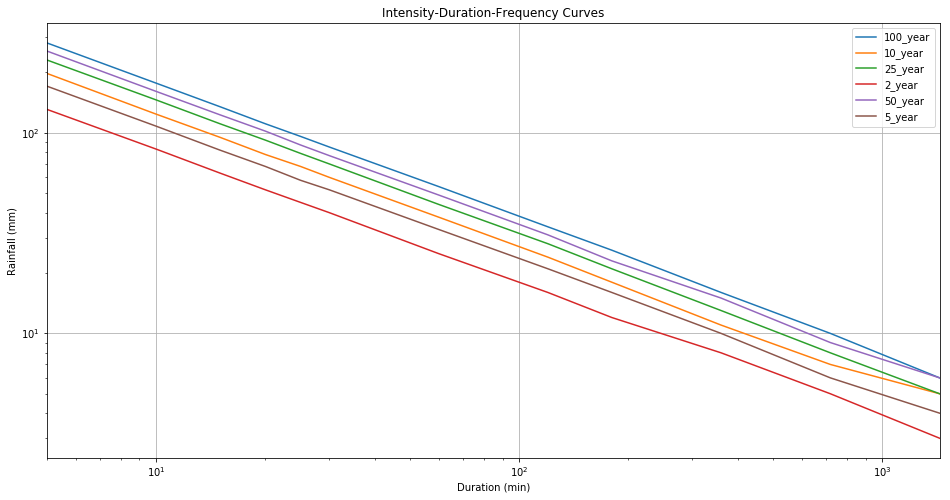

In [8]:
A = df.plot(figsize=(16,8), title='Intensity-Duration-Frequency Curves', logx=True, logy=True, grid=True)
A.set_ylabel('Rainfall (mm)')
A.set_xlabel('Duration (min)')